<a href="https://colab.research.google.com/github/poojitagarg/AI_Classifier_Comparison/blob/master/classifier_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run some setup code for this notebook.
import random
import numpy as np
import pandas as pd
from sklearn import datasets

In [0]:
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

In [0]:
iris = datasets.load_iris()
digits = datasets.load_digits()
boston = datasets.load_boston()

In [0]:
print(iris.keys())
print("Header : ", iris.feature_names)
print("Target : ", iris.target[np.random.choice(150,20)])
print(iris.data.shape)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Header :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target :  [2 1 2 2 1 0 0 0 1 2 0 0 1 0 1 0 2 0 1 2]
(150, 4)


In [0]:
print(digits.keys())
print('class:', digits.target_names)
print("Target : ", digits.target[np.random.choice(150,20)])
print(digits.data.shape)
print(digits.images.shape)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
class: [0 1 2 3 4 5 6 7 8 9]
Target :  [8 0 7 7 5 6 3 6 4 9 6 8 0 9 7 4 5 3 7 6]
(1797, 64)
(1797, 8, 8)


In [0]:
print(boston.keys())
print("Target : ", boston.target[np.random.choice(150,20)])
print(boston.data)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Target :  [21.2 22.  24.8 21.  22.2 19.6 24.  13.8 24.7 13.4 22.6 34.9 18.2 30.8
 21.  21.6 22.  15.6 16.5 12.7]
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [0]:
# saved into numpy matrix
bos_data=boston.data
bos_data.shape


(506, 13)

In [0]:
#adding column for price values
bos_data=np.c_[bos_data,np.zeros((len(bos),1))]
bos_data.shape

(506, 14)

In [0]:
bos_data[:,-1]=boston.target
print(bos_data)
print(bos_data.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]
(506, 14)


In [0]:
# adding column for bins(0,1,2)
bos_data=np.c_[bos_data,np.zeros((len(bos),1))]
bos_data.shape

(506, 15)

In [0]:
# 0--> low cost bracket
# 1--> Medium cost bracket
# 2--> High cost bracket
for i in range(len(bos_data)):
  if (bos_data[i,-2]>=5) & (bos_data[i,-2]<17):
    bos_data[i,-1]=0
  elif (bos_data[i,-2]>=17) & (bos_data[i,-2]<25):
    bos_data[i,-1]=1
  else:
    bos_data[i,-1]=2
print(bos_data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 4.9800e+00 2.4000e+01 1.0000e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 9.1400e+00 2.1600e+01 1.0000e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 4.0300e+00 3.4700e+01 2.0000e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 5.6400e+00 2.3900e+01 1.0000e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 6.4800e+00 2.2000e+01 1.0000e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 7.8800e+00 1.1900e+01 0.0000e+00]]


In [0]:

from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [0]:
X = digits.data
y = digits.target
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [0]:
X = bos_data[:,:-2]
y = bos_data[:,-1]
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.33, random_state=4)

IRIS **dataset**

In [0]:
#knn(3) for iris dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X1_train, y1_train)
y1_pred=knn.predict(X1_test)
print(metrics.accuracy_score(y1_test, y1_pred))

0.6946107784431138


In [0]:
# SCV(kernel='linear',c=0.025) for iris dataset
clf=SVC(C=0.025,kernel="linear")
clf.fit(X1_train,y1_train)
y1_pred=clf.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.95


In [0]:
#SVC(c=1,gamma=2)
clf=SVC(C=1,gamma=2)
clf.fit(X1_train,y1_train)
y1_pred=clf.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.9833333333333333


In [0]:
#gaussian process classifier(1.0*RBF(1.0))
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)
gpc.fit(X1_train,y1_train)
y1_pred=gpc.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.9666666666666667


In [0]:
#decision tree classifer
from sklearn import tree
dtc = tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(X1_train,y1_train)
y1_pred=dtc.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.9666666666666667


In [0]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features=1)
rfc.fit(X1_train,y1_train)
y1_pred=rfc.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))


0.9666666666666667


In [0]:
#MLP classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1)
mlp.fit(X1_train,y1_train)
y1_pred=mlp.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.9666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [0]:
#adaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
mlp = AdaBoostClassifier()
mlp.fit(X1_train,y1_train)
y1_pred=mlp.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.9333333333333333


In [0]:
#GaussianNB classifier
from sklearn.naive_bayes import GaussianNB
mlp = GaussianNB()
mlp.fit(X1_train,y1_train)
y1_pred=mlp.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.9666666666666667


In [0]:
#Quadratic Discriminant analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
mlp = QuadraticDiscriminantAnalysis()
mlp.fit(X1_train,y1_train)
y1_pred=mlp.predict(X1_test)
print(metrics.accuracy_score(y1_test,y1_pred))

0.9833333333333333


DIGITS **dataset**

In [0]:
#knn(3) for digits dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X2_train, y2_train)
y2_pred=knn.predict(X2_test)
print(metrics.accuracy_score(y2_test, y2_pred))

0.9848484848484849


In [0]:
# SCV(kernel='linear',c=0.025) for digits
clf=SVC(C=0.025,kernel="linear")
clf.fit(X2_train,y2_train)
y2_pred=clf.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.9764309764309764


In [0]:
#SVC(c=1,gamma=2)
clf=SVC(C=1,gamma=2)
clf.fit(X2_train,y2_train)
y2_pred=clf.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.1717171717171717


In [0]:
#gaussian process classifier(1.0*RBF(1.0))
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel)
gpc.fit(X2_train,y2_train)
y2_pred=gpc.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))


0.09932659932659933


In [0]:
#decision tree classifer
dtc = tree.DecisionTreeClassifier(max_depth=5)
dtc.fit(X2_train,y2_train)
y2_pred=dtc.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.6481481481481481


In [0]:
#random forest classifier
rfc = RandomForestClassifier(n_estimators=10,max_depth=5,max_features=1)
rfc.fit(X2_train,y2_train)
y2_pred=rfc.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.8265993265993266


In [0]:
#MLP classifier
mlp = MLPClassifier(alpha=1)
mlp.fit(X2_train,y2_train)
y2_pred=mlp.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.9747474747474747


In [0]:
#adaBoost classifier
mlp = AdaBoostClassifier()
mlp.fit(X2_train,y2_train)
y2_pred=mlp.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.20707070707070707


In [0]:
#GaussianNB classifier
mlp = GaussianNB()
mlp.fit(X2_train,y2_train)
y2_pred=mlp.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.8619528619528619


In [0]:
#Quadratic Discriminant analysis classifier
mlp = QuadraticDiscriminantAnalysis()
mlp.fit(X2_train,y2_train)
y2_pred=mlp.predict(X2_test)
print(metrics.accuracy_score(y2_test,y2_pred))

0.8905723905723906


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Boston **dataset**

In [0]:
#knn(3) for digits dataset
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.6946107784431138


In [0]:
# SCV(kernel='linear',c=0.025) for digits
knn=SVC(C=0.025,kernel="linear")
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.8263473053892215


In [0]:
#SVC(c=1,gamma=2)
knn=SVC(C=1,gamma=2)
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.4431137724550898


In [0]:
#gaussian process classifier(1.0*RBF(1.0))
knn = GaussianProcessClassifier(kernel=kernel)
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.8143712574850299


In [0]:
#decision tree classifer
knn = tree.DecisionTreeClassifier(max_depth=5)
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.8143712574850299


In [0]:
#random forest classifier
knn= RandomForestClassifier(n_estimators=10,max_depth=5,max_features=1)
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.8203592814371258


In [0]:
#adaBoost classifier
knn = AdaBoostClassifier()
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.8083832335329342


In [0]:
#MLP classifier
knn = MLPClassifier(alpha=1)
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.7365269461077845


In [0]:
#GaussianNB classifier
knn = GaussianNB()
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.7125748502994012


In [0]:
#Quadratic Discriminant analysis classifier
knn = QuadraticDiscriminantAnalysis()
knn.fit(X3_train, y3_train)
y3_pred=knn.predict(X3_test)
print(metrics.accuracy_score(y3_test, y3_pred))

0.7904191616766467


In [0]:
X=['KNN','SVC(C=0.025)','SVC(C=1)','Gauss_classifier','Decision_tree','Random_forest','MLP','AdaBoost','GaussianNB','QuadDiscriminant']

In [0]:
i=[[0.69,0.95,0.98,0.96,0.96,0.96,0.96,0.93,0.96,0.98],
   [0.98,0.97,0.17,0.09,0.64,0.82,0.97,0.20,0.86,0.89],
   [0.69,0.82,0.44,0.81,0.81,0.82,0.80,0.73,0.71,0.79]]

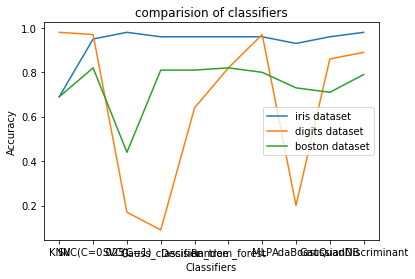

In [0]:
import matplotlib.pyplot as plt
plt.plot(X, i[0], label = "iris dataset")
plt.plot(X, i[1], label = "digits dataset")
plt.plot(X, i[2], label = "boston dataset")
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('comparision of classifiers')
plt.legend()
plt.show()